# Theorische vragen Deep Learning

Sabine De Vreese, Stijn Lievens en Simon De Gheselle

11 oktober 2025

## Inleiding
Hieronder vind je een vragenlijst die je kan helpen bij het studeren voor het theorie-examen van het opleidingsonderdeel Deep Learning. Veel vragen op het theorie-examen zullen gebaseerd zijn op de lijst van onderstaande vragen. Het is dus een goed idee als je minstens deze vragen kan beant-woorden op het moment dat je het examen aflegt.

## Hoofdstuk 16: Natuurlijke Taalverwerking met RNNs en “attention”

1. (Oefening 2 uit het boek) Leg uit waarom encoder-decoder RNNs worden gebruikt i.p.v. sequentie-naar-sequentie RNNs voor het automatisch vertalen van tekst.
    > Encoder-Decoder RNN laat toe om volledige context van de inputzin te verwerken (S2V) en daarna de vertaling te beginnen via (V2S) in de decoder.
2. (Oefening 3 uit het boek) Hoe kunnen RNNs gebruikt worden met input-sequenties van verschillende lengte? Hoe worden uitvoersequenties van variabele lengte behandeld?
    > Input even lang maken kan via padding en/of masking
    > Output kan een stopteken toevoegen zoals <eos>

3. (Oefening 4 uit het boek) Wat is “beam search” en waarom zou je hetgebruiken.
    > Beam search is een zoekalgoritme, gebruikt voor kwaliteit van vertalingen te verbeten. Houdt k (beam width) meest vaarschijnlijke sequenties bij. Zo kunnen meerdere padden overlopen worden

4. (Oefening 6 uit het boek) Wat is de belangrijkste laag in de “transformer”-architectuur? Wat is het doel van deze laag
    > Belangrijkste laag van de transformer, is de self-attention in de encoder. De multi-head self-attention geeft betekenis aan de woorden gebaseerd op de volledige context
    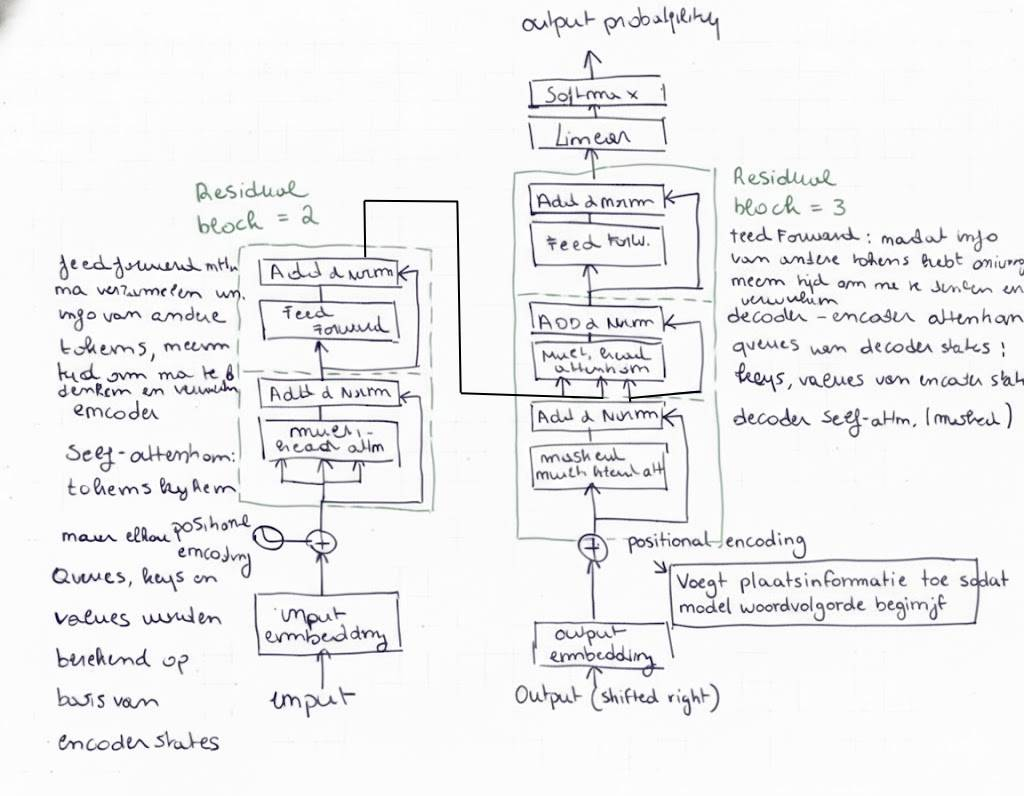

5. Beschouw “dot-product attention” (i.e. “attention” gebaseerd op het in-wendig product). Voor de eenvoud nemen weg een schalingsfactor mee in de berekening. Anders gezegd, de uitvoer van de attentielaag is:
    $$
    Attention(Q,K,V) =softmax(Q^TK)V
    $$
    waarbij de softmax werkt over iedere rij van zijn argument.
    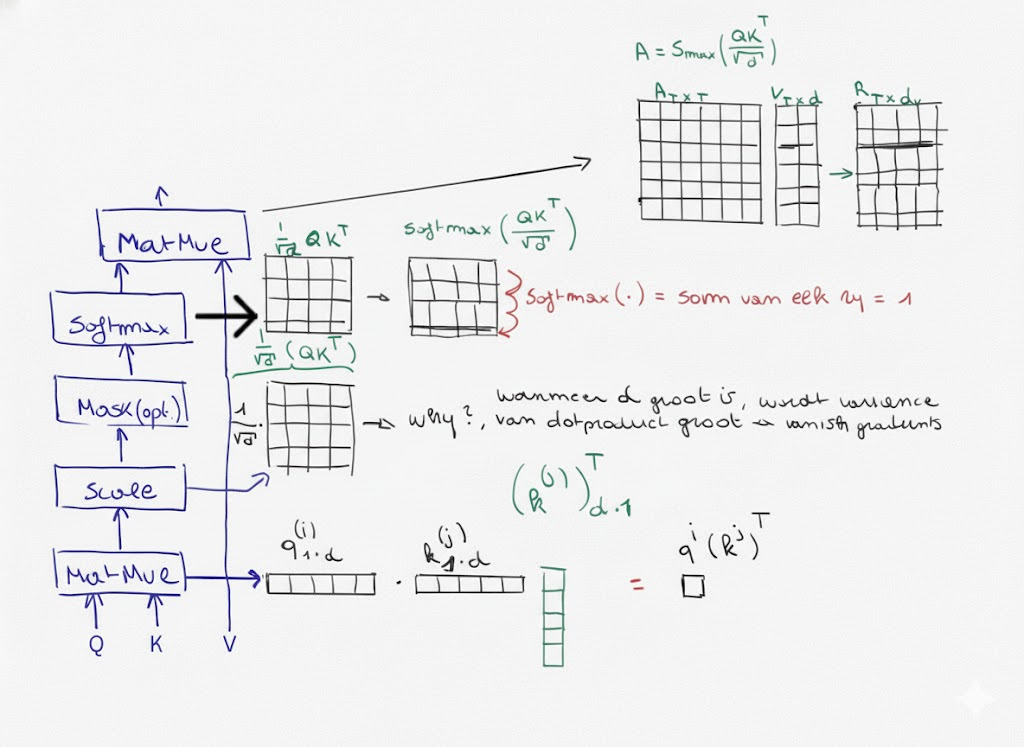
    Veronderstel dat we beschikken over een sequentie van lengte $3$ en dat de dimensie van de “embedding” gelijk is aan $4$. De “embeddings” worden gegeven door:
    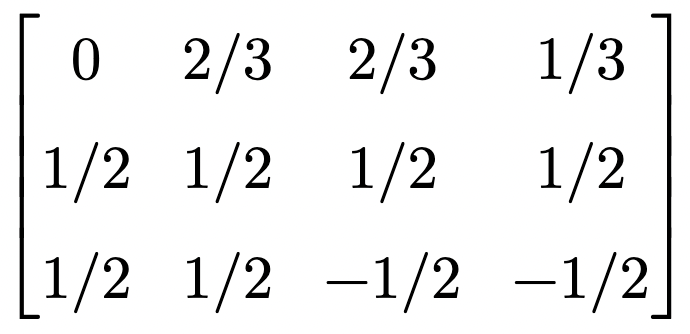
    Pas “self-attention” toe op deze sequentie. Wat is de uitvoer van het “attention” mechanisme. Toon je berekeningen.

    **Stap 1: Bepaal matrices $(Q,K,V)$**
    Van uitgaan dat de Embedding matrix (X), direct gebruikt wordt voor alle drie:
    - Q = X
    - K = X
    - V = X

    **Stap 2: Bereken het Dot-Product $(QK^T)$**
    - Vermenigvuldig de matrix met zijn eigen <ins>getransponeerde</ins> versie
    - $3\times 3$ matrix (sequentielengte is 3)

        Matrix X (is Q,K en V):
    $$
    X = \begin{bmatrix} 0 & 2/3 & 2/3 & 1/3 \\ 1/2 & 1/2 & 1/2 & 1/2 \\ 1/2 & 1/2 & -1/2 & -1/2 
    \end{bmatrix}
    \\[1em]

    K^T \rightarrow \text{de rijen van X zijn:}\\
    \begin{aligned}
    \text{rij 1: } & (0,\; 2/3,\; 2/3,\; 1/3) \\
    \text{rij 2: } & (1/2,\; 1/2,\; 1/2,\; 1/2) \\
    \text{rij 3: } & (1/2,\; 1/2,\; -1/2,\; -1/2)
    \end{aligned}
    \\[1em]
    \text{Die worden nu kolommen in } K^T:\\
    K^T \text{ of } (X^T) = \begin{bmatrix} 0 & 1/2 & 1/2 \\ 2/3 & 1/2 & 1/2 \\ 2/3 & 1/2 & -1/2 \\ 1/3 & 1/2 & -1/2 \end{bmatrix}
    $$
    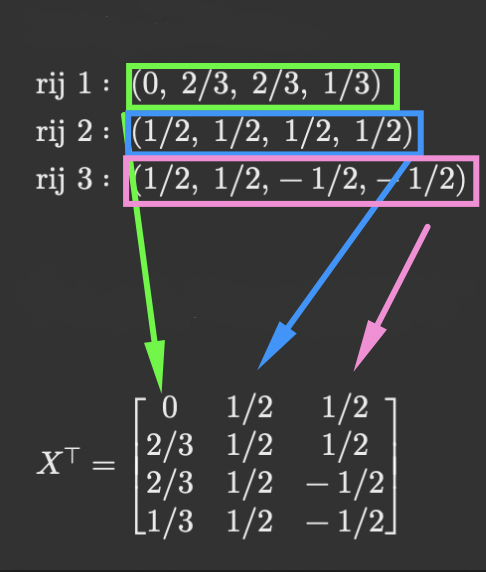
    $$
    
    \text{matrixvermenigvuldiging}\;Q \cdot K^T\\

    $$
    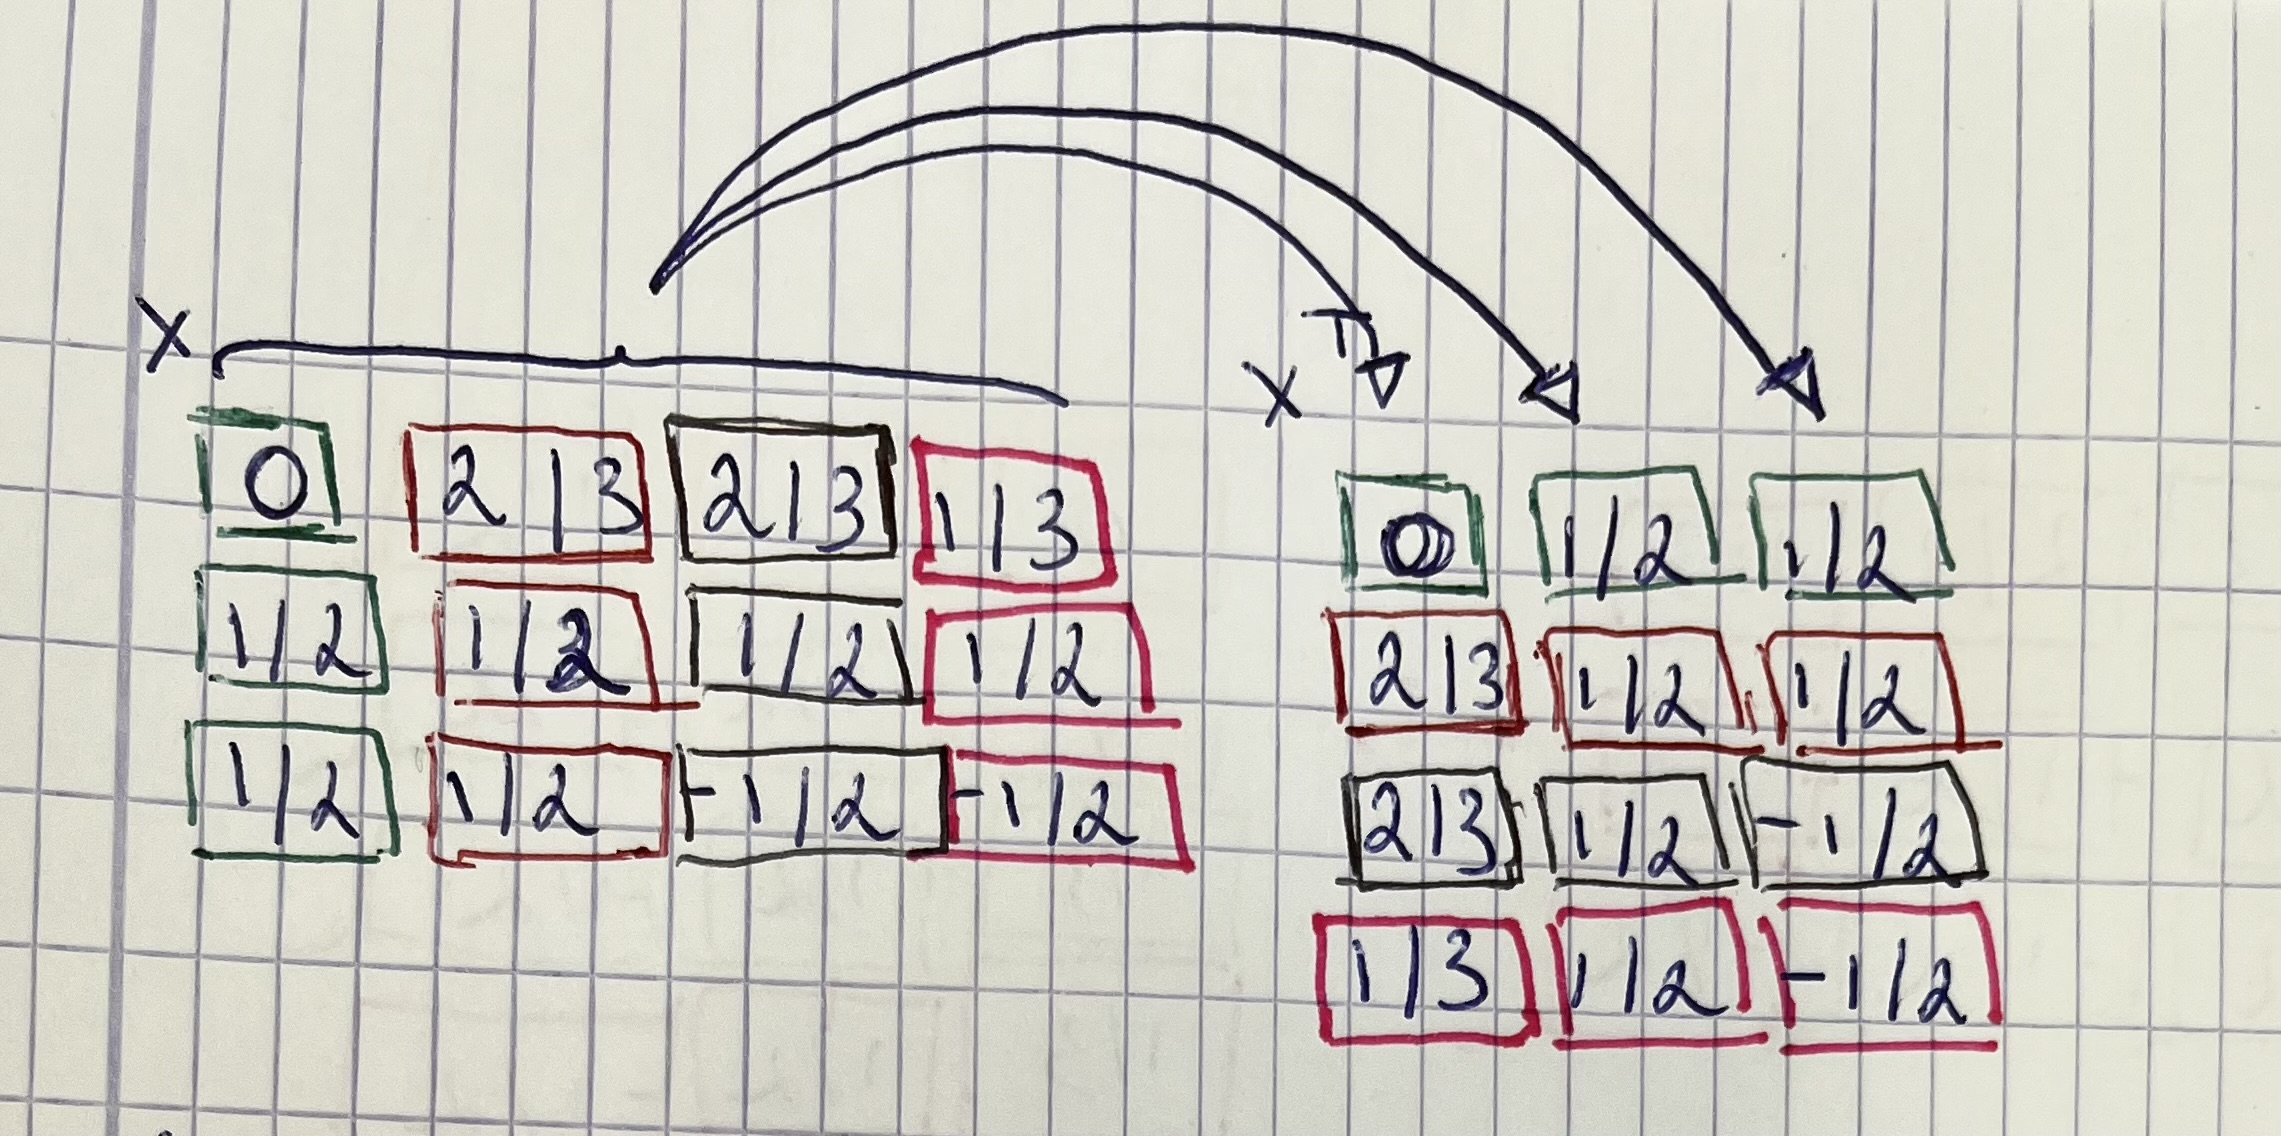
    (1,1) $X$ Rij 1 $X^T$ Kolom 1: $(0*0)+(2/3*2/3) + (2/3*2/3) +(1/3*1/3) = \underline{1}$

    (1,2) $X$ Rij 1 $X^T$ Kolom 2: $(0*1/2) + (2/3*1/2) + (2/3*1/2) + (1/3*1/2)= \underline{0.83}$

    (1,3) $X$ Rij 1 $X^T$ Kolom 3: $(0*1/2) + (2/3*1/2) + (2/3*-1/2) + (1/3*-1/2)=\underline{-1.66}$
    $$
    \begin{bmatrix}
    1 & 0.83 & -1.66\\
    \_ & \_ & \_\\
    \_ & \_ & \_\\
    \end{bmatrix}
    $$
    (2,1) $X$ Rij 2 $X^T$ Kolom 1: $(1/2*0)+(1/2*2/3) + (1/2*2/3) +(1/2*1/3) = \underline{0.83}$

    (2,2) $X$ Rij 2 $X^T$ Kolom 2: $(1/2*1/2) + (1/2*1/2) + (1/2*1/2) + (1/2*1/2)= \underline{1}$

    (2,3) $X$ Rij 2 $X^T$ Kolom 3: $(1/2*1/2) + (1/2*1/2) + (1/2*-1/2) + (1/2*-1/2) =\underline{0}$
    $$
    \begin{bmatrix}
    1 & 0.83 & -1.66\\
    0.83 & 1 & 0\\
    \_ & \_ & \_\\
    \end{bmatrix}
    $$
    (3,1) $X$ Rij 2 $X^T$ Kolom 1: $(1/2*0)+(1/2*2/3) + (-1/2*2/3) +(-1/2*1/3) = \underline{-1.66}$

    (3,2) $X$ Rij 2 $X^T$ Kolom 2: $(1/2*1/2) + (1/2*1/2) + (-1/2*1/2) + (-1/2*1/2)= \underline{0}$

    (3,3) $X$ Rij 2 $X^T$ Kolom 3: $(1/2*1/2) + (1/2*1/2) + (-1/2*-1/2) + (-1/2*-1/2) =\underline{1}$
    $$
    \begin{bmatrix}
    1 & 0.83 & -1.66\\
    0.83 & 1 & 0\\
    -1.66 & 0 & 1\\
    \end{bmatrix}
    $$

    **Stap 3: Scaling**
    Formule $\frac{1}{\sqrt{d}}(QK^T)$
    - De dimensie $(d_k)$ van de embeddings
      - Dimensie is $4$ (staat in de opgave)
    - Elk getal uit $3\times3$ matrix delen door $\sqrt{4} = 2$
        $$
        \begin{bmatrix}
        0.5 & 0.415 & -0.083\\
        0.415 & 0.5 & 0\\
        -0.083 & 0 & 0.5\\
        \end{bmatrix}
        $$

    **Stap 4: Softmax**
    Pas de softmax toe op elke rij van matrix
    - De formule vaan een getal z in een rij is: $\sigma(z)_i = \frac{e^{z_i}}{\sum e^{z_j}}$\
    Rij 1:
      - $e^{0.5} \approx 1.649$, $e^{0.415}\approx 1.514$, $e^{-0.083} \approx 0.920$
      - $\sum e^{z_j} = 1.649 + 1.514 + 0.920 = \mathbf{4.083}$\
    Rij 2:
      - $e^{0.415} \approx 1.514$, $e^{0.5} \approx 1.649$, $e^{0} \approx 1$
      - $\sum e^{z_j} = 1.514 + 1.649 + 1 = \mathbf{4.163}$\
    Rij 3:
       - $e^{-0.083} \approx 0.9200$, $e^{0} \approx 1$, $e^{0.5} \approx 1.649$
       - $\sum e^{z_j} = 0.9200 + 1 + 1.649 = \mathbf{3.569}$
    - Scores om in gewichten (percentages)
      - Daarna elk woord van rij 1 delen door $4.083$
        - Woord 1: $1.649/4.083 \approx 0.404 \rightarrow 40$% aandacht voor zichzelf
        - Woord 2: $1.514/4.083 \approx 0.371 \rightarrow 37$% aandacht voor woord 2
        - Woord 3: $0.920/4.083 \approx 0.225 \rightarrow 23$% aandacht voor woord 3
      - Daarna elk woord van rij 2 delen door $4.163$
        - Woord 4: $1.514/4.163 \approx 0.36 \rightarrow 36.4$%
        - Woord 5: $1.649/4.163 \approx 0.396\rightarrow 39.6$%
        - Woord 6: $1/4.163 \approx 0.240\rightarrow 24.0$%
      - Totslot elk woord van rij 3 delen door $3.569$
        - Woord 7: $0.920/3.569 \approx 0,257\rightarrow 25.7$%
        - Woord 8: $1/3.569 \approx 0.280 \rightarrow 28.0$%
        - Woord 9: $1.649/3.569 \approx 0,4620 \rightarrow 46.2$%

    Attention Weight Matrix ($A$):
    $$A = \begin{bmatrix}
    0.404 & 0.371 & 0.225 \\
    0.364 & 0.396 & 0.240 \\
    0.257 & 0.280 & 0.462 \\
    \end{bmatrix}$$

**Stap 5: Finale berekening**
Nieuwe $3\times3$ (Attention weight) matrix vermenigvulden met matrix $V$
- Resultaat is <ins>Attention output</ins>
- Een $3\times4$ matrix (3 tokens, elk met nieuwe embedding van dimensie 4)
$$
Attention(Q,K,V) = A \cdot V
\\[0.5em]
A = \begin{bmatrix} 0.404 & 0.371 & 0.225 \\ 0.364 & 0.396 & 0.240 \\ 0.257 & 0.280 & 0.462 \end{bmatrix}, \quad V = \begin{bmatrix} 0 & 2/3 & 2/3 & 1/3 \\ 1/2 & 1/2 & 1/2 & 1/2 \\ 1/2 & 1/2 & -1/2 & -1/2 \end{bmatrix}
\\[1em]
\begin{align*}
(1,1) = (0.404 * 0) + (0.371* 1/2) + (0.225 * 1/2) = 0.298\\
(1,2) = (0.404 * 2/3) + (0.371* 1/2) + (0.225 * 1/2) = 0.567\\
(1,3) = (0.404 * 2/3) + (0.371* 1/2) + (0.225 * -1/2) = 0.342\\
(1,4) = (0.404 * 1/3) + (0.371* 1/2) + (0.225 * -1/2) = 0.207
\end{align*}
\\[0.5em]
\begin{align*}
(2,1) = (0.364 * 0) + (0.396* 1/2) + (0.240 * 1/2) = 0.318\\
(2,2) = (0.364 * 2/3) + (0.396* 1/2) + (0.240 * 1/2) = 0.560\\
(2,3) = (0.364 * 2/3) + (0.396* 1/2) + (0.240 * -1/2) = 0.320\\
(2,4) = (0.364 * 1/3) + (0.396* 1/2) + (0.240 * -1/2) = 0.199\\
\end{align*}
\\[0.5em]
\begin{align*}
(3,1) = (0.257 * 0) + (0.280* 1/2) + (0.462 * 1/2) = 0.371 \\
(3,2) = (0.257 * 2/3) + (0.280* 1/2) + (0.462 * 1/2) = 0.542\\
(3,3) = (0.257 * 2/3) + (0.280* 1/2) + (0.462 * -1/2) = 0.080\\
(3,4) = (0.257 * 1/3) + (0.280* 1/2) + (0.462 * -1/2) = -0.005
\end{align*}
$$

Attention output:
$$\text{Output} = \begin{bmatrix}
0.298 & 0.568 & 0.343 & 0.208 \\
0.318 & 0.561 & 0.321 & 0.199 \\
0.371 & 0.542 & 0.080 & -0.005 \\
\end{bmatrix}$$

6. Herhaal de berekening van vorig puntje maar pas “masked self-attention” (of causale padding) toe. Geef duidelijk aan in de berekening hoe “masking” werkt.
> Masking is een optionele stap en wordt opgevoerd nar scaling. 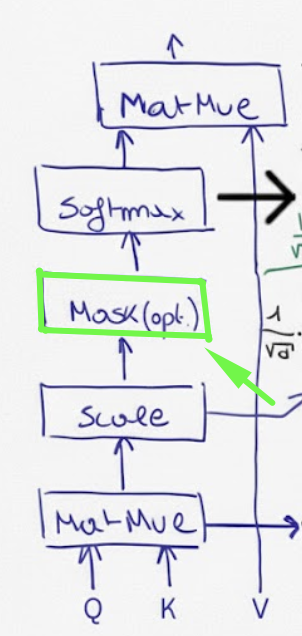


*Voor masking:*
$$
\begin{bmatrix}
0.5 & 0.415 & -0.083\\
0.415 & 0.5 & 0\\
-0.083 & 0 & 0.5\\
\end{bmatrix}
$$
*Na Masking (causal masking):*
$$
\begin{bmatrix}
0.5 & -\infty & -\infty\\
0.415 & 0.5 & -\infty\\
-0.083 & 0 & 0.5\\
\end{bmatrix}
$$

**Softmax**
$$
\begin{align*}
\text{rij 1}\\
&= e^{0.5} \approx 1.648, e^{-\infty} = 0, e^{-\infty} = 0\\
&= \frac{[1.648,0,0]}{1.648}\\
&= [1,0,0]
\end{align*}
\\[0.5em]

\begin{align*}
\text{rij 2}\\
&= e^{0.415} \approx 1.513, e^{0.5} = 1.648, e^{-\infty} = 0\\
&= \frac{[1.513,1.648,0]}{1.648 + 1.513 = 3.161}\\
&= [0.479,0.521,0]
\end{align*}
\\[0.5em]

\begin{align*}
\text{rij 3}\\
&= e^{-0.083} \approx 0.920, e^{0} = 1, e^{0.5} = 1.648\\
&= \frac{[0.920,1,1.648]}{0,920+1+1,648  = 3.568}\\
&= [0.258,0.280,0.462]
\end{align*}
$$

Attention Weight Matrix ($A$):
$$A = \begin{bmatrix}
1 & 0 & 0 \\
0.479 & 0.521 & 0 \\
0.258 & 0.280 & 0.462 \\
\end{bmatrix}$$

**Finale berekening**
$$
Attention(Q,K,V) = A \cdot V
\\[0.5em]
A = \begin{bmatrix}
1 & 0 & 0 \\
0.479 & 0.521 & 0 \\
0.258 & 0.280 & 0.462 \\
\end{bmatrix}, \quad V = \begin{bmatrix} 0 & 2/3 & 2/3 & 1/3 \\ 1/2 & 1/2 & 1/2 & 1/2 \\ 1/2 & 1/2 & -1/2 & -1/2 \end{bmatrix}
$$

$$
(1,1) = (1 * 0) + (0 * 1/2) + (0 * 1/2) = 0\\
(1,2) = (1 * 2/3) + (0 * 1/2) + (0 * 1/2) = 0.66\\
(1,3) = (1 * 2/3) + (0 * 1/2) + (0 * -1/2) = 0.66\\
(1,4) = (1 * 1/3) + (0 * 1/2) + (0 * -1/2) = 0.33
\\[0.5em]
(2,1) = (0.479 * 0) + (0.521 * 1/2) + (0 * 1/2) = 0.260\\
(2,2) = (0.479 * 2/3) + (0.521 * 1/2) + (0 * 1/2) = 0.579\\
(2,3) = (0.479 * 2/3) + (0.521 * 1/2) + (0 * -1/2) = 0.579\\
(2,4) = (0.479 * 1/3) + (0.521 * 1/2) + (0 * -1/2) = 0.420
\\[0.5em]
(3,1) = (0.257 * 0) + (0.280* 1/2) + (0.462 * 1/2) = 0.371 \\
(3,2) = (0.257 * 2/3) + (0.280* 1/2) + (0.462 * 1/2) = 0.542\\
(3,3) = (0.257 * 2/3) + (0.280* 1/2) + (0.462 * -1/2) = 0.080\\
(3,4) = (0.257 * 1/3) + (0.280* 1/2) + (0.462 * -1/2) = -0.005
\\[1.5em]
\text{Output}_{\text{masked}} = \begin{bmatrix}
0 & 0.660 & 0.660 & 0.330 \\
0.260 & 0.579 & 0.579 & 0.420 \\
0.371 & 0.542 & 0.080 & -0.005 \\
\end{bmatrix}$$

7. Figuur 1 geeft een overzicht van de “transformer”-architectuur. Neem bijhet beantwoorden van de onderstaande vragen aan dat de sequentielengte $𝑁 = 128$ en dat $𝑑_{model}= 512$

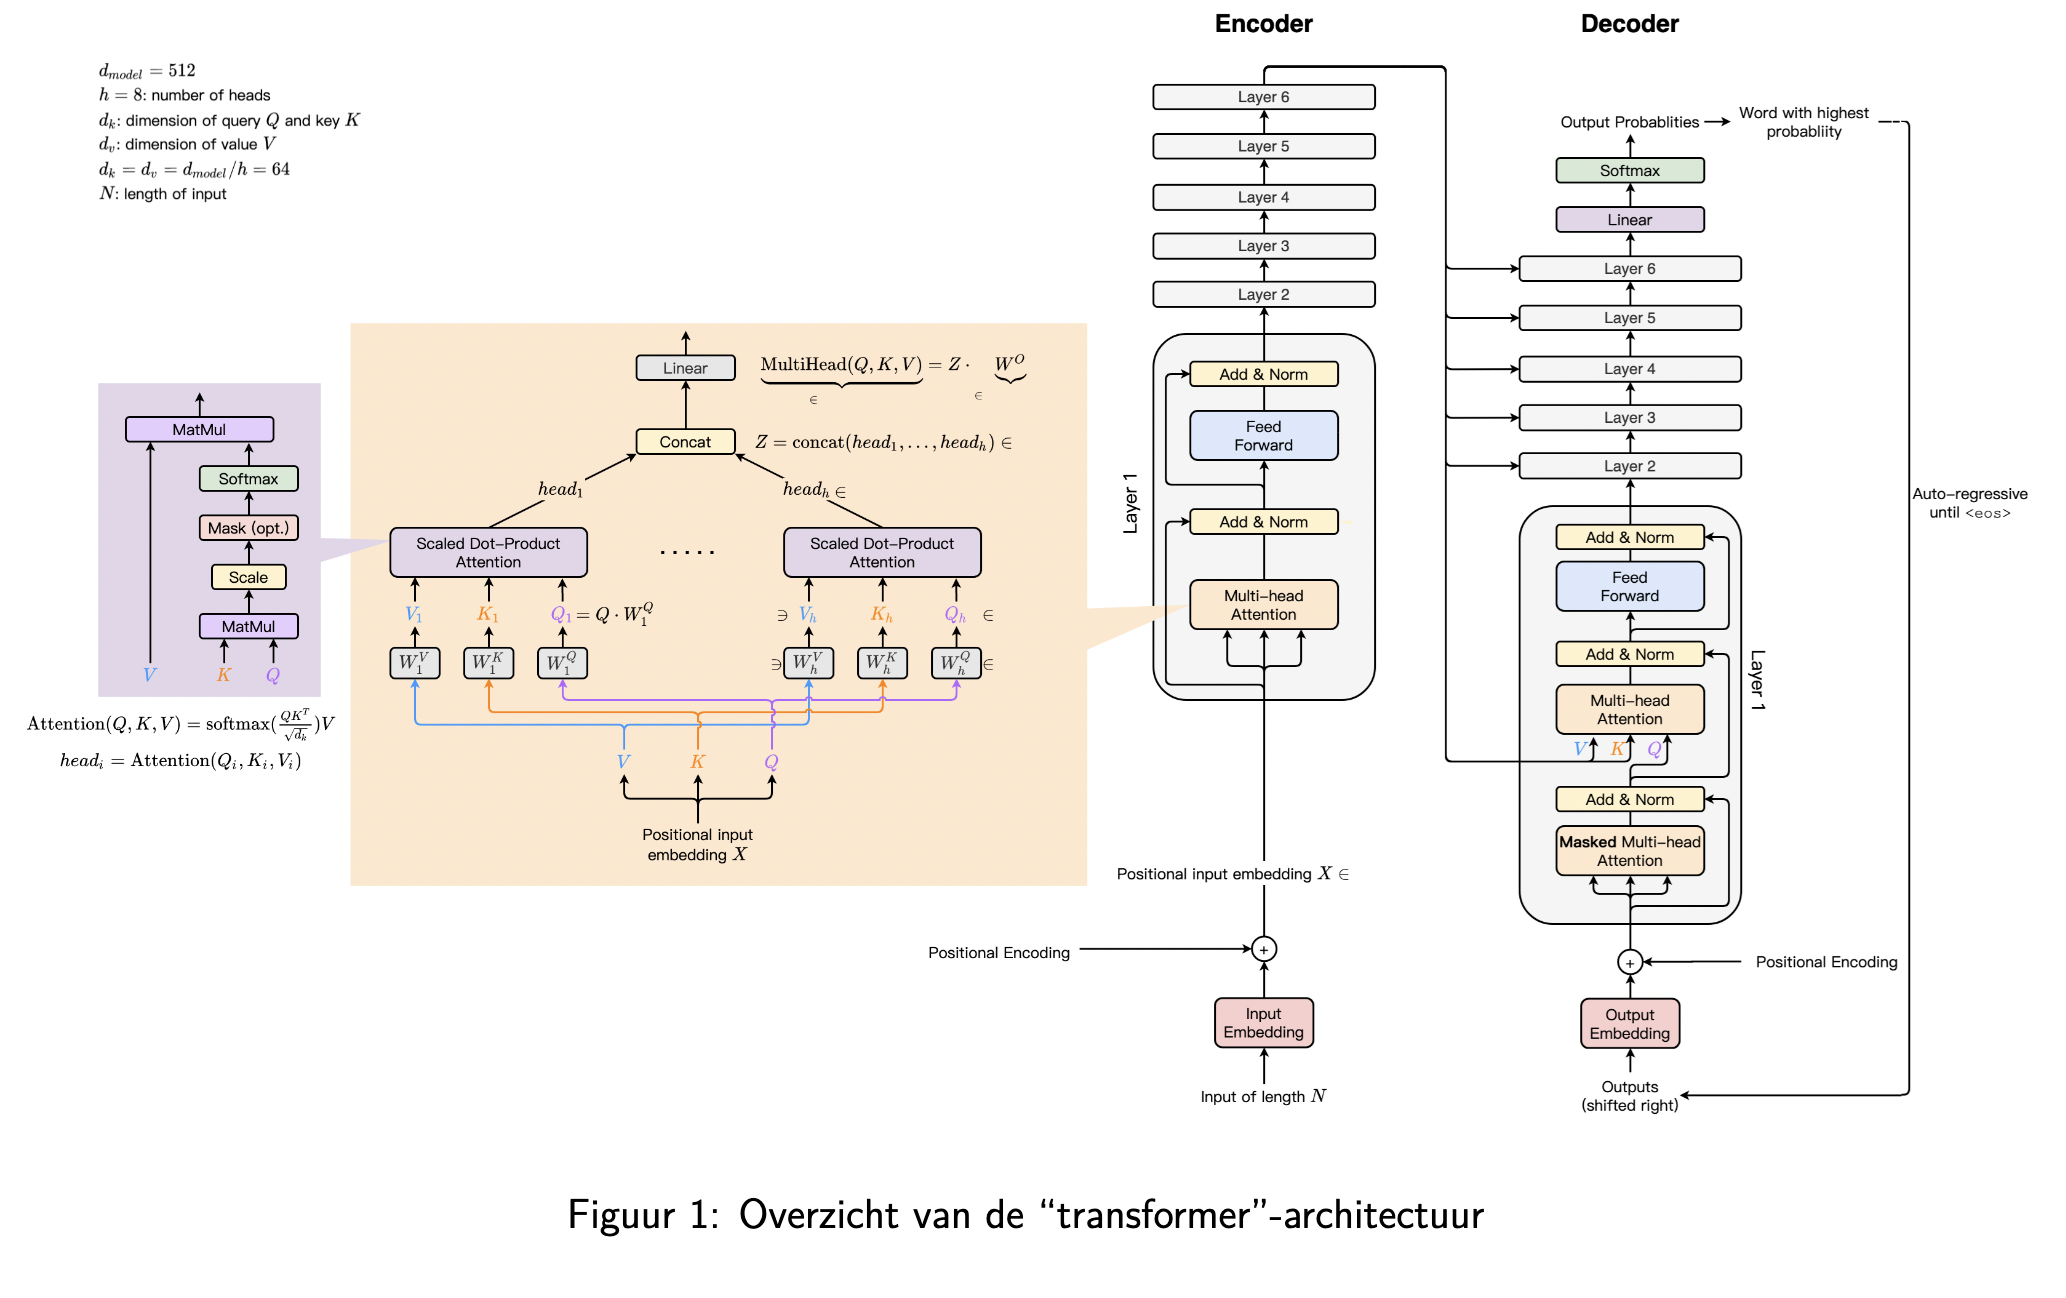

- De afbeelding bevat meerdere ∈-symbolen zonder dat er een dimensie werd gespecificeerd. Wat is de juiste dimensie van de matrices $V_h ∈ R^{?\times?}$
    $$
    \begin{align*}
    \text{heads} = 8\\
    N = 128\\
    d_{model} = 512\\
    d_k =d_v = 512/8 = 64\\
    V_h \in \mathbb{R}^{128 \times 64}
    \end{align*}
    $$

- Waarom wordt deze vorm van “attention” multi-head attention genoemd?
    > Omdat deze attention meerdere koppen (heads) heeft voor Q,K en V. Hierdor kan het ook dieper kijken in de woorden en specalist worden in zijn taak. totslot kan het ook parallel (tegelijketijd) werken

- Wat is het doel (of nut) van de verschillende “heads”?
    > Hierdoor kan er een andere bril worden opgezet om te kijken naar de woorden. Dit biedt ook parallisatie (tegelijkertijd werken), kan heads apart van elkaar uitvoeren op de GPU == sneller dan oudere modellen (RNN's)

- Waarom wordt in de decoder “masked multi-head attention” gebruikt?
    > Omdat decoder niet mag spieken naar de toekomst, worden de toekomstige waarden gemasked. (Autoregressieve eigenshap, leren van oudere data)

- Waarom wordt er “Output shifted right” gebruikt bij de decoder?
    > De output sequence wordt met één plaats verschoven naar rechts om `<start>` of `sos` toe te voegen. Dit help het model bij het trainen, zonder dit heeft het model geen input voor het eerste woord.

- In de encoder en de decoder worden er nu 6 lagen gebruikt? Kan dit aantal worden gevarieerd?
    > Ja, meer lagen maakt het model dieper en beter.

- Onderaan de oranje rechthoek staan de matrices V,K en Q? Zijn dit verschillende matrices? Of vallen bepaalde matrices samen in bepaalde gevallen?
    > In de oranje rechthoek vallen de bronnen samen: $V$, $K$ en $Q$ worden alle drie afgeleid van de input $X$. Door weights toe te voegen aan deze bronnen veranderen ze.

- Beschrijf de intuïtie achter de namen “values”, “keys” en “queries”
  - Values (*Inhoud van het boek*): Daadwerkelijk waarde
  - Queries (*Zoekterm*): Wat er gezocht wordt
  - Keys (*Labels op de boeken*): Wat voor info het heeft.

    De **Query** stelt een vraag, de **Key** beschrijft wat een woord te bieden heeft, en de **Value** is de daadwerkelijke informatie die wordt doorgegeven als er een match is

- Welke matrices in het overzicht in Figuur 1 bevatten de trainbare parameters?
    > Alle W (weights) bevatten trainbare parameters

- Wat is het doel van de positionele “embedding” die worden toegevoegd aan de invoer en uitvoer “embeddings”?
    > Deze worden gebruikt om de worden een positie in de zin te geven.

- Veronderstel dat de “transformer” volledig getraind is. Zullen twee verschillende sequenties van 128 woorden (of tokens) een verschillende positionele “embedding” hebben?
    > Neen, want het woord op vakje 6 in sequentie A gaat dezelfde positie hebben als woord op vakje 6 in sequentie B.

- Waarom is het belangrijk dat de vorm (“shape”) van de uitvoer van de “Multi-head attention’ ̊laag dezelfde is als de vorm van de invoer?
    > Na de attention laag wordt een toevoeging (add) uitgevoerd, die alleen werkt als de vormen dezelfde vorm hebben.

- Nadat de “transformer” getraind is wensen we de zin “i love football very much” te vertalen in het Spaans. De correcte vertaling in het Spaans is “amo mucho el futbol”.
    ```text
    De Encoder:
    De Input is de volledige zin met lengte N: 'i love football very much'
    en leest alleen deze zin. De woorden van de zin ["i", "love", "football", "very", "much] gaan in te self-attention tegelijker tijd.

    ```
    ```text
    De Decoder:
    Werkt auto-regressief (woord voor woord bouwt), om het eerste woord (amo) 
    te generen is een <start> of <eos>-tag nodig.

    Na 'amo', wordt dit woord als input gebruikt voor de volgende stap om 
    'mucho' te voorspellen.

    ```


  - Hoeveel keer wordt de encoder uitgevoerd?\
    > De encoder krijgt alleen de Engelse zin, dus 1 keer

  - Hoeveel keer wordt de decoder uitgevoerd? Je mag aannemen dat de vertaling die geproduceerd wordt door de decoder correct is
    > De decoder werkt auto-regressief, dus woord per woord: 4 woorden + <eos> = 5 keer

- De blauwe (Point-wise) “Feed Forward” (Networks) blokjes bestaan uit twee volledig geconnecteerde lagen. Kan je het aantal neuronen in deze twee lagen (in principe) volledig vrije kiezen? Wat zijn de eventuele restricties?
  - *Restrictie*: De input- en outputdimensie liggen vast en moeten gelijk zijn aan $d_{\text{model}}$, zodat de residual connections en optellingen mogelijk zijn.
  - *Vrijheid*: De grootte van de verborgen laag in het midden kan in principe vrij gekozen worden.